# Part 1 - Introduction

In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [46]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.0.0+cpu


In [47]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [48]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

In [49]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

In [50]:
# transfer to the GPU device
x = x.to(device)
y = y.to(device)

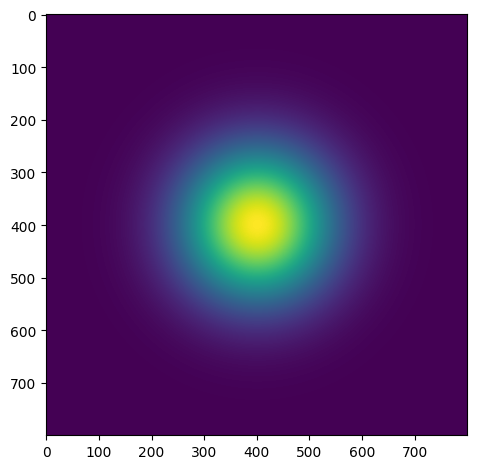

In [51]:
# Compute Gaussian
z1 = torch.exp(-(x**2+y**2)/2.0)
plt.imshow(z1.numpy())
plt.tight_layout()
plt.show()

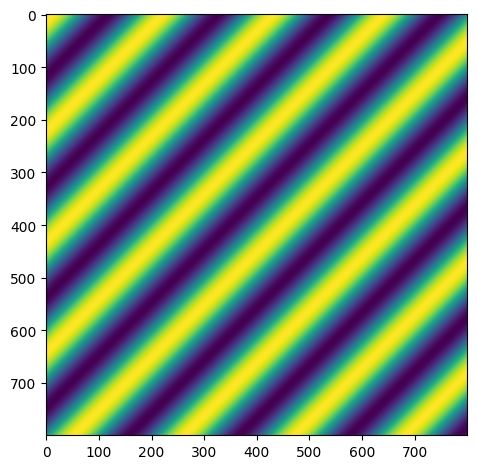

In [56]:
z2 = torch.sin((3*x+ 3*y))
plt.imshow(z2.numpy())
plt.tight_layout()
plt.show()

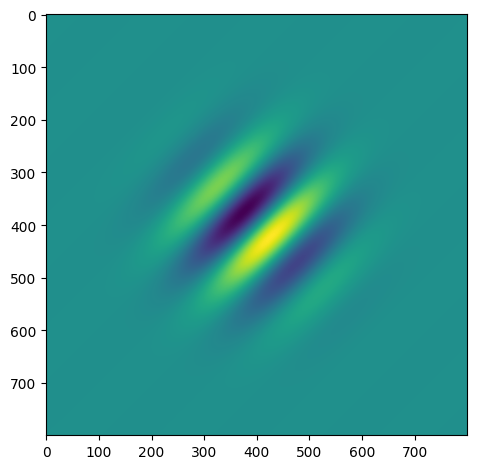

In [57]:
# Gabor Filter - Edge detector
z3 = z1*z2
plt.imshow(z3.numpy())
plt.tight_layout()
plt.show()

# Part 2 - Mandelbrot Set

In [10]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

In [11]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)

In [12]:
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [13]:
#Mandelbrot Set
def gen_mandelbrot(z, zs, ns, n_iter):
    for i in tqdm(range(n_iter)):
        #Compute the new values of z: z^2 + x
        zs_ = zs*zs + z
        #Have we diverged with this new value?
        not_diverged = torch.abs(zs_) < 4.0
        #Update variables to compute
        ns += not_diverged.type(torch.FloatTensor)
        zs = zs_
    return ns


In [14]:
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 846.10it/s]
/tmp/ipykernel_1495937/34765647.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


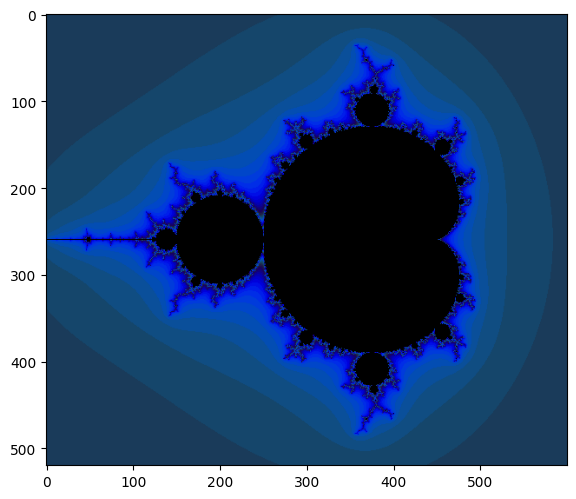

In [15]:
arr = gen_mandelbrot(z, zs, ns, 200)

plt.imshow(processFractal(arr.numpy()))
plt.tight_layout(pad=0)
plt.show()

100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.87it/s]
/tmp/ipykernel_1495937/34765647.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


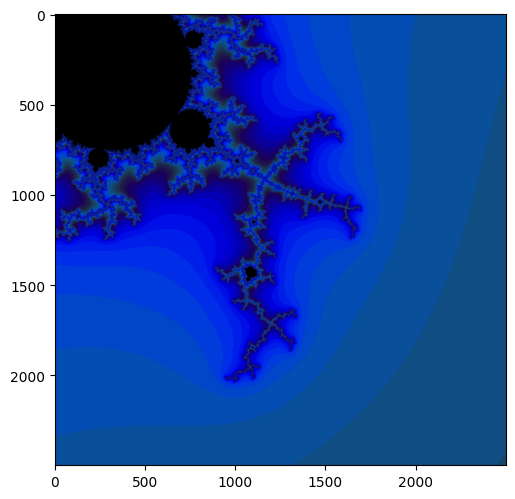

In [16]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[0.5:0.75:0.0001, 0.25:0.5:0.0001]
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = torch.zeros_like(z)
ns = torch.zeros_like(z)
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)
arr = gen_mandelbrot(z, zs, ns, 200)

plt.imshow(processFractal(arr.numpy()))
plt.tight_layout(pad=0)
plt.show()


In [17]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -1.75:1.75:0.005]

In [18]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
c = torch.full(z.shape, -0.79+0.15j)
zs = z
ns = torch.zeros_like(z)
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [19]:
#Julia Set
n=3
R = 3

def gen_julia(z, c, zs, ns, n_iter):
    for i in range(n_iter):
        #Compute the new values of z: z^2 + x
        zs_ = zs*zs + c
        #Have we diverged with this new value?
        not_diverged = torch.abs(zs_) < 4.0
        #Update variables to compute
        ns += not_diverged.type(torch.FloatTensor)
        zs = zs_
    return ns

/tmp/ipykernel_1495937/34765647.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


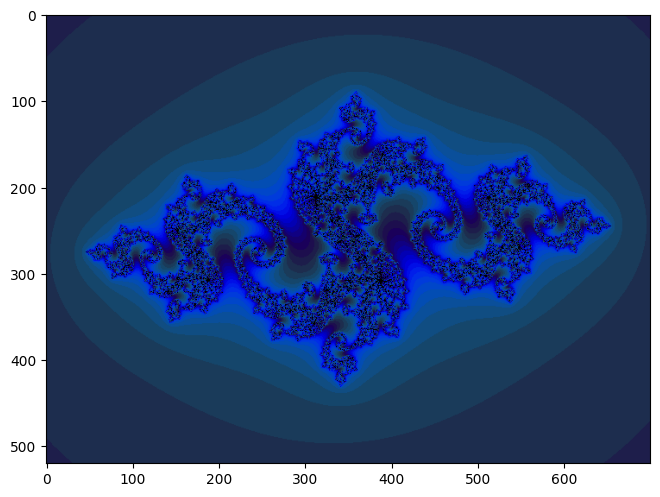

In [20]:
arr = gen_julia(z, c, zs, ns, 200)

plt.imshow(processFractal(arr.numpy()))
plt.tight_layout(pad=0)
plt.show()

In [21]:
print(X.shape)

(520, 700)


# Part 3

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|███████████████████████████████████| 12001/12001 [00:10<00:00, 1133.49it/s]


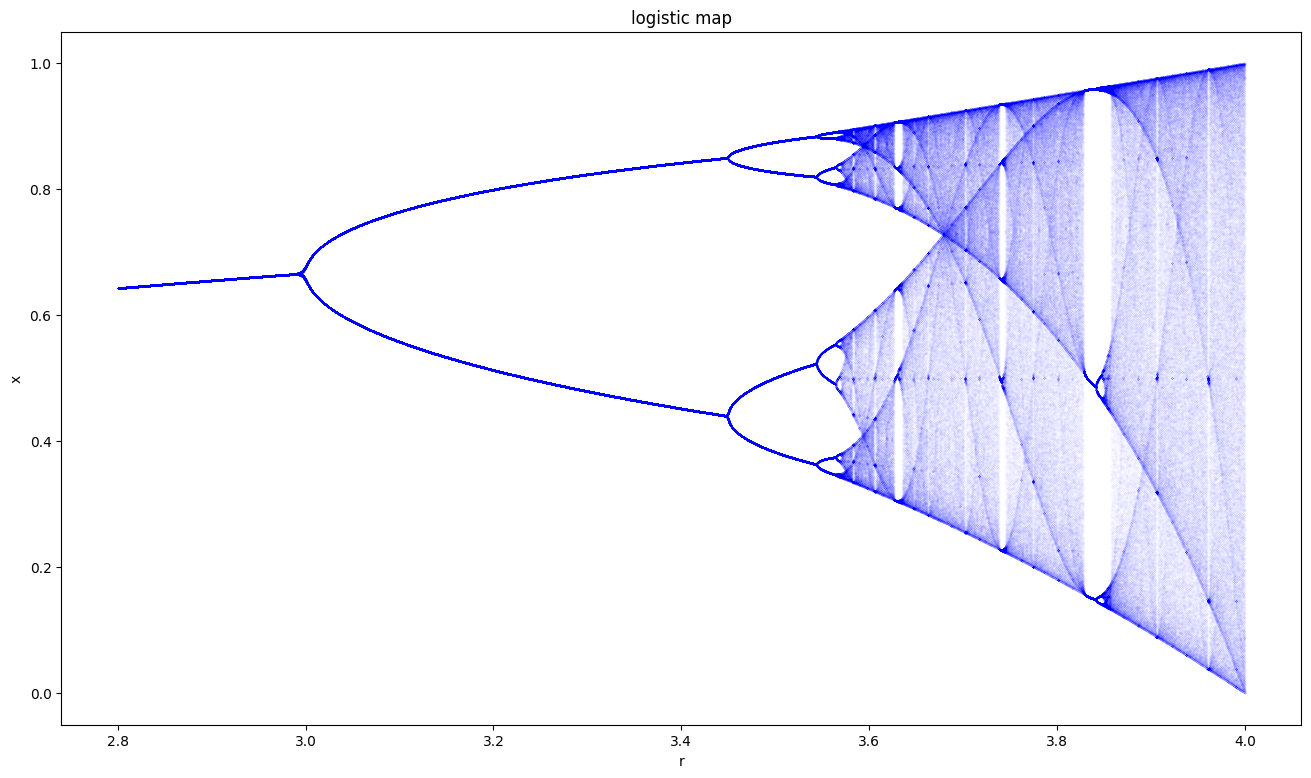

In [43]:
interval = (2.8, 4)  # start, end
accuracy = 0.0001
reps = 600  # number of repetitions
numtoplot = 200
lims = np.zeros(reps)

fig, biax = plt.subplots()
fig.set_size_inches(16, 9)

lims[0] = np.random.rand()
for r in tqdm(np.arange(interval[0], interval[1], accuracy)):
    for i in range(reps - 1):
        lims[i + 1] = r * lims[i] * (1 - lims[i])
    # if abs(r - 3.8) < 0.0001:
    #     print([r] * numtoplot) 
    #     print(lims[reps - numtoplot :])
    #     print(lims[:10])
    biax.plot([r] * numtoplot, lims[reps - numtoplot :], "b.", markersize=0.02)

biax.set(xlabel="r", ylabel="x", title="logistic map")
plt.show()

tensor([[0.0590, 0.0590, 0.0590,  ..., 0.0590, 0.0590, 0.0590]],
       dtype=torch.float64)
tensor([[0.9410, 0.9410, 0.9410,  ..., 0.9410, 0.9410, 0.9410]],
       dtype=torch.float64)


100%|██████████████████████████████████████| 599/599 [00:00<00:00, 14216.45it/s]


tensor([[0.1555, 0.1555, 0.1555,  ..., 0.2221, 0.2221, 0.2221]],
       dtype=torch.float64)
tensor([[0.1396, 0.1396, 0.1396,  ..., 0.1836, 0.1836, 0.1836]],
       dtype=torch.float64)
tensor([[0.1422, 0.1422, 0.1422,  ..., 0.1927, 0.1927, 0.1927]],
       dtype=torch.float64)
tensor([[0.1418, 0.1418, 0.1418,  ..., 0.1906, 0.1906, 0.1906]],
       dtype=torch.float64)
tensor([[0.1418, 0.1418, 0.1418,  ..., 0.1911, 0.1911, 0.1911]],
       dtype=torch.float64)
tensor([[0.1418, 0.1418, 0.1418,  ..., 0.1910, 0.1910, 0.1910]],
       dtype=torch.float64)
tensor([[0.1418, 0.1418, 0.1418,  ..., 0.1910, 0.1910, 0.1910]],
       dtype=torch.float64)
tensor([[0.1418, 0.1418, 0.1418,  ..., 0.1910, 0.1910, 0.1910]],
       dtype=torch.float64)
tensor([[0.1418, 0.1418, 0.1418,  ..., 0.1910, 0.1910, 0.1910]],
       dtype=torch.float64)
tensor([[0.1418, 0.1418, 0.1418,  ..., 0.1910, 0.1910, 0.1910]],
       dtype=torch.float64)
finished iteration!


100%|███████████████████████████████████| 12001/12001 [00:07<00:00, 1563.07it/s]


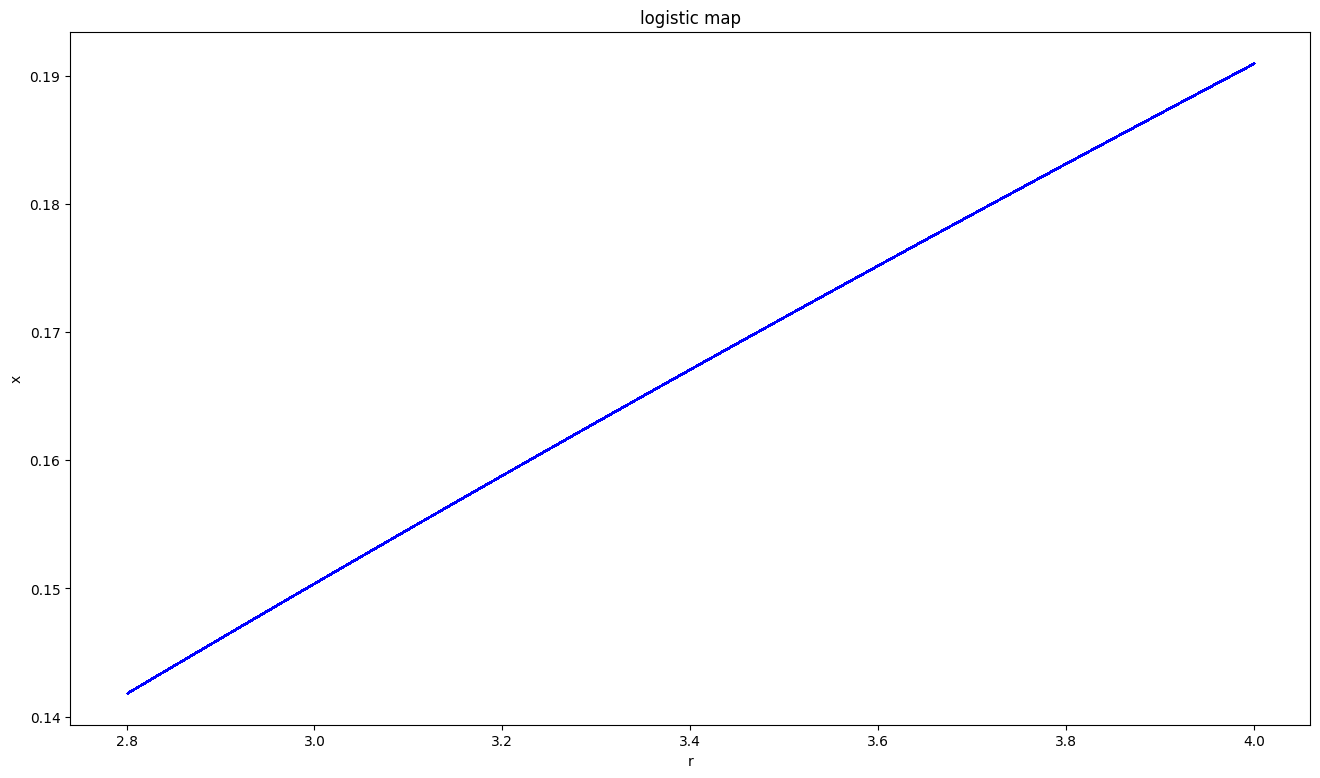

In [24]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

interval = (2.8, 4)  # start, end
accuracy = 0.0001
reps = 600  # number of repetitions
numtoplot = 200

fig, biax = plt.subplots()
fig.set_size_inches(16, 9)

x = torch.arange(interval[0], interval[1], accuracy).view(1, -1).type(torch.DoubleTensor).to(device)
lims = torch.zeros(reps, x.shape[1]).view(reps, 1, x.shape[1]).type(torch.DoubleTensor).to(device)
seed = 0.05902023
lims[0] = torch.tensor([[seed]*x.shape[1]])
# lims = torch.tensor([[np.random.rand()]*x.shape[1]]).to(device)
# print(torch.mm(lims[0], x))
# print(lims[0].shape)

# print(torch.transpose(lims[0], 1, 0).shape)
# print(x.shape)
# print("here", torch.mm(lims[0], torch.transpose(x, 1, 0)).shape)
# print("here", torch.mul(torch.mul(x, lims[0]), (1-lims[i])))
# print("here", torch.mul(x, lims[0]).shape)
# print(x)
# print(lims)
# print(x.shape)
# print(lims.shape)
print(lims[0])
print(1-lims[0])
# for r in np.arange(interval[0], interval[1], accuracy):
for i in tqdm(range(reps - 1)):
    lims[i + 1] = torch.mul(torch.mul(x, lims[0]), (1-lims[i]))
    if i < 10:
        print(lims[i + 1])
        # print(lims[i + 1]) 
        # print(lims[reps - numtoplot :])
        # print(lims[:10])
        
    # print(i)
print("finished iteration!")
x = x.cpu()
lims = lims.cpu()
# for r in x[0]:
#     biax.plot([r] * numtoplot, lims[reps - numtoplot :], "b.", markersize=0.02)

# biax.set(xlabel="r", ylabel="x", title="logistic map")
# plt.show()
for i in tqdm(range(x[0].shape[0])):
    biax.plot([x[0][i].item()] * numtoplot, lims[reps - numtoplot :, 0, i].numpy(), "b.", markersize=0.02)

biax.set(xlabel="r", ylabel="x", title="logistic map")
plt.show()

In [25]:
print(lims[reps - numtoplot :, 0, i].numpy().shape)
for i in range(x[0].shape[0]):
    biax.plot([x[i]] * numtoplot, lims[reps - numtoplot :, 0, i].numpy(), "b.", markersize=0.02)

biax.set(xlabel="r", ylabel="x", title="logistic map")
plt.show()

(200,)


/home/kenzo/packages/miniconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (200,) + inhomogeneous part.

In [ ]:
# print(lims.shape)
np.random.rand()

In [ ]:
print(r)

0.21360325813293457


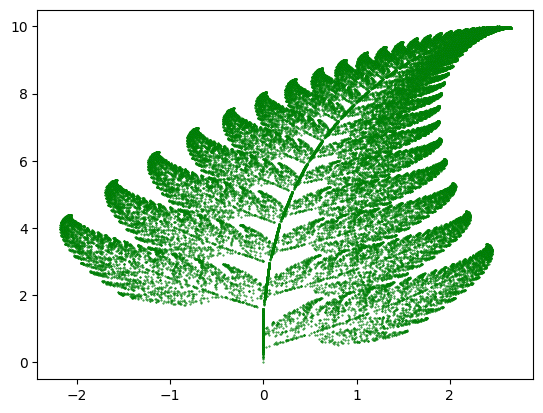

In [26]:
# importing necessary modules
import matplotlib.pyplot as plt
from random import randint
from time import time

starttime = time()
# initializing the list
x = []
y = []
  
# setting first element to 0
x.append(0)
y.append(0)
  
current = 0
  
for i in range(1, 50000):
  
    # generates a random integer between 1 and 100
    z = randint(1, 100)
  
    # the x and y coordinates of the equations
    # are appended in the lists respectively.
      
    # for the probability 0.01
    if z == 1:
        x.append(0)
        y.append(0.16*(y[current]))
      
    # for the probability 0.85    
    if z>= 2 and z<= 86:
        x.append(0.85*(x[current]) + 0.04*(y[current]))
        y.append(-0.04*(x[current]) + 0.85*(y[current])+1.6)
      
    # for the probability 0.07    
    if z>= 87 and z<= 93:
        x.append(0.2*(x[current]) - 0.26*(y[current]))
        y.append(0.23*(x[current]) + 0.22*(y[current])+1.6)
      
    # for the probability 0.07    
    if z>= 94 and z<= 100:
        x.append(-0.15*(x[current]) + 0.28*(y[current]))
        y.append(0.26*(x[current]) + 0.24*(y[current])+0.44)
          
    current = current + 1

endtime = time()
print(endtime-starttime)
plt.scatter(x, y, s = 0.2, edgecolor ='green')
plt.show()

tensor([24, 98, 35,  ..., 59, 75, 98])
2.121066093444824
tensor([[0.0000, 0.0000, 0.4480,  ..., 0.0250, 0.1065, 0.2269],
        [0.0000, 1.6000, 0.8240,  ..., 2.1307, 3.4101, 4.4943],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]])


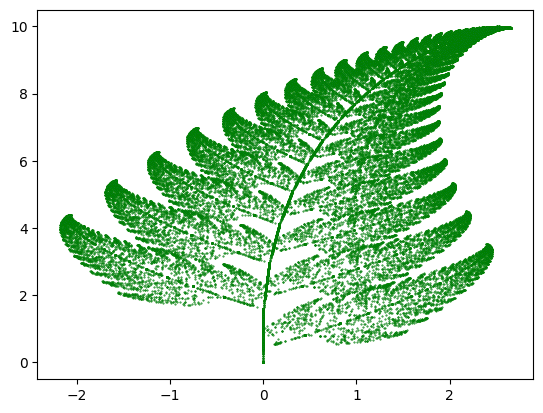

In [27]:
# importing necessary modules
import torch
import matplotlib.pyplot as plt
from random import randint
from time import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_pts = 50000
# initializing the list
txy = torch.tensor([[[0., 0., 1.]]*n_pts]).to(device)
txy = txy.view(50000, 1, 3)
t1 = torch.tensor([[0., 0., 0.], 
                   [0., 0.16, 0.], 
                   [0., 0., 1.]]).to(device)

t2 = torch.tensor([[0.85, 0.04, 0.], 
                   [-0.04, 0.85, 1.6], 
                   [0., 0., 1.]]).to(device)

t3 = torch.tensor([[0.2, -0.26, 0.], 
                   [0.23, 0.22, 1.6], 
                   [0., 0., 1.]]).to(device)

t4 = torch.tensor([[-0.15, 0.28, 0.], 
                   [0.26, 0.24, 0.44], 
                   [0., 0., 1.]]).to(device)

t1 = torch.tensor([[0., 0., 0.], 
                   [0., 0.16, 0.], 
                   [0., 0., 1.]]).to(device)

t2 = torch.tensor([[0.85, -0.04, 0.], 
                   [0.04, 0.85, 0.], 
                   [0., 1.6, 1.]]).to(device)

t3 = torch.tensor([[0.2, 0.23, 0.], 
                   [-0.26, 0.22, 0.], 
                   [0., 1.6, 1.]]).to(device)

t4 = torch.tensor([[-0.15, 0.26, 0.], 
                   [0.28, 0.24, 0.], 
                   [0., 0.44, 1.]]).to(device)

r = torch.randint(0, 100, (n_pts, )).to(device)
print(r)
current = 0
  
starttime = time()
for i in range(n_pts-1):
    # print(r[i])
    if r[i] == 1:
        txy[i+1] = torch.mm(txy[i], t1)
        # print(txy[i+1])
      
    # for the probability 0.85    
    if r[i]>= 2 and r[i]<= 86:
        # print(torch.mm(txy[i], t2))
        txy[i+1] = torch.mm(txy[i], t2)
      
    # for the probability 0.07    
    if r[i]>= 87 and r[i]<= 93:
        txy[i+1] = torch.mm(txy[i], t3)
      
    # for the probability 0.07    
    if r[i]>= 94 and r[i]<= 100:
        txy[i+1] = torch.mm(txy[i], t4)


endtime = time()
print(endtime-starttime)
txy = torch.transpose(txy.view(n_pts, 3), 0, 1)
print(txy)
# plt.scatter(txy)
plt.scatter(txy[0], txy[1], s = 0.2, edgecolor ='green')
# plt.show()

In [28]:
n_pts = 50000
# initializing the list
txy = torch.tensor([[[0., 0., 1.]]*n_pts]).to(device)
txy = txy.view(50000, 1, 3)
# t1 = torch.tensor([[0., 0., 0.], 
#                    [0., 0.16, 0.], 
#                    [0., 0., 1.]]).to(device)

# t2 = torch.tensor([[0.85, 0.04, 0.], 
#                    [-0.04, 0.85, 1.6], 
#                    [0., 0., 1.]]).to(device)

# t3 = torch.tensor([[0.2, -0.26, 0.], 
#                    [0.23, 0.22, 1.6], 
#                    [0., 0., 1.]]).to(device)

# t4 = torch.tensor([[-0.15, 0.28, 0.], 
#                    [0.26, 0.24, 0.44], 
#                    [0., 0., 1.]]).to(device)

t1 = torch.tensor([[0., 0., 0.], 
                   [0., 0.16, 0.], 
                   [0., 0., 1.]]).to(device)

t2 = torch.tensor([[0.85, -0.04, 0.], 
                   [0.04, 0.85, 0.], 
                   [0., 1.6, 1.]]).to(device)

t3 = torch.tensor([[0.2, 0.23, 0.], 
                   [-0.26, 0.22, 0.], 
                   [0., 1.6, 1.]]).to(device)

t4 = torch.tensor([[-0.15, 0.26, 0.], 
                   [0.28, 0.24, 0.], 
                   [0., 0.44, 1.]]).to(device)

r = torch.randint(0, 100, (n_pts, )).to(device)

i = 1
# txy[i] = torch.mm(txy[i-1], t1)
# print(torch.mm(txy[i-1], t1))
print(txy)
# print(txy.view(50000, 1, 3).shape)
if r[i]>= 2 and r[i]<= 86:
    print(torch.mm(txy[i], t2))
    txy[i+1] = torch.mm(txy[i], t2)


tensor([[[0., 0., 1.]],

        [[0., 0., 1.]],

        [[0., 0., 1.]],

        ...,

        [[0., 0., 1.]],

        [[0., 0., 1.]],

        [[0., 0., 1.]]])


In [29]:
t1 = torch.tensor([[1, 1], [1, 1]])
t2 = torch.tensor([[2,2]])
# torch.mm(t2, t1)
for i in t1:
    print(i)
print(t1[0])
print(t1[1])

tensor([1, 1])
tensor([1, 1])
tensor([1, 1])
tensor([1, 1])
